In [1]:
import pandas as pd
import acquire as aqr
import prepare as prep
import wrangle as wr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
prepped_telco = prep.prep_telco()

In [3]:
prepped_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_contract,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check
0,0016-QLJIS,Female,0,1,1,65,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
1,0017-DINOC,Male,0,0,0,54,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2,0019-GFNTW,Female,0,0,0,56,0,0,1,1,...,0,0,1,1,0,0,1,0,0,0
3,0056-EPFBG,Male,0,1,1,20,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,0078-XZMHT,Male,0,1,0,72,1,1,0,1,...,0,0,1,1,0,0,1,0,0,0


In [4]:
train, validate, test  = prep.split_telco(prepped_telco)

train_encoded, shape: (3943, 33)
validate_encoded, shape: (1691, 33)
test_encoded, shape: (1409, 33)


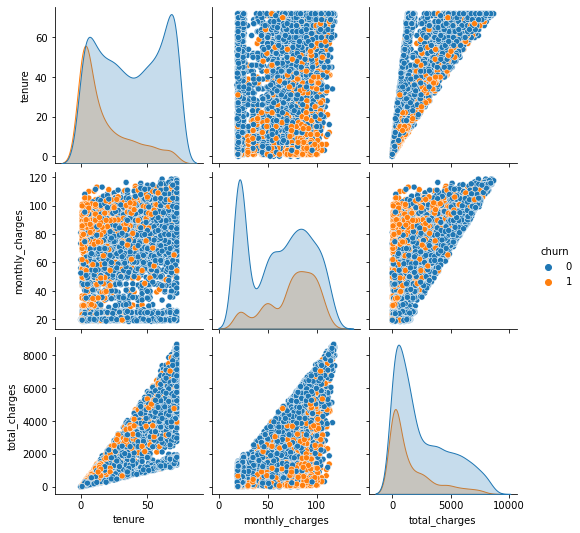

In [5]:
sns.pairplot(train[['churn','tenure','monthly_charges', 'total_charges']], hue='churn')


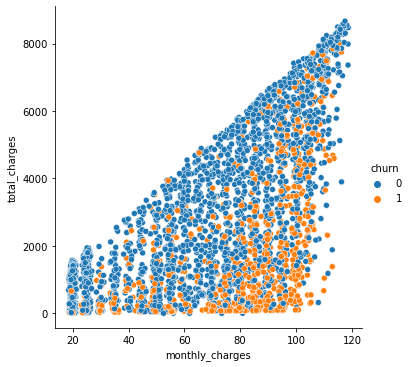

In [6]:
sns.relplot(x='monthly_charges', y ='total_charges', data = train, hue='churn', kind='scatter')

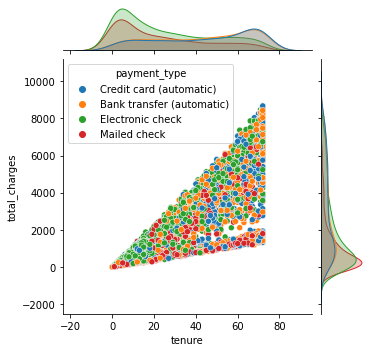

In [7]:
sns.jointplot(x="tenure", y="total_charges", data=train, hue='payment_type', kind='scatter', height=5)
plt.show()

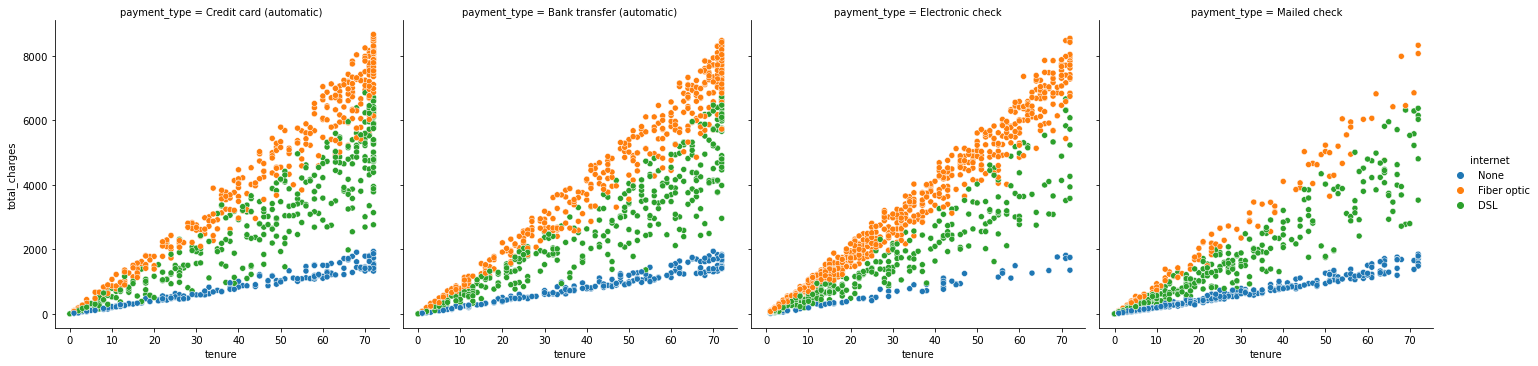

In [8]:
sns.relplot(x="tenure", y="total_charges", data=train, hue='internet', col='payment_type') # 

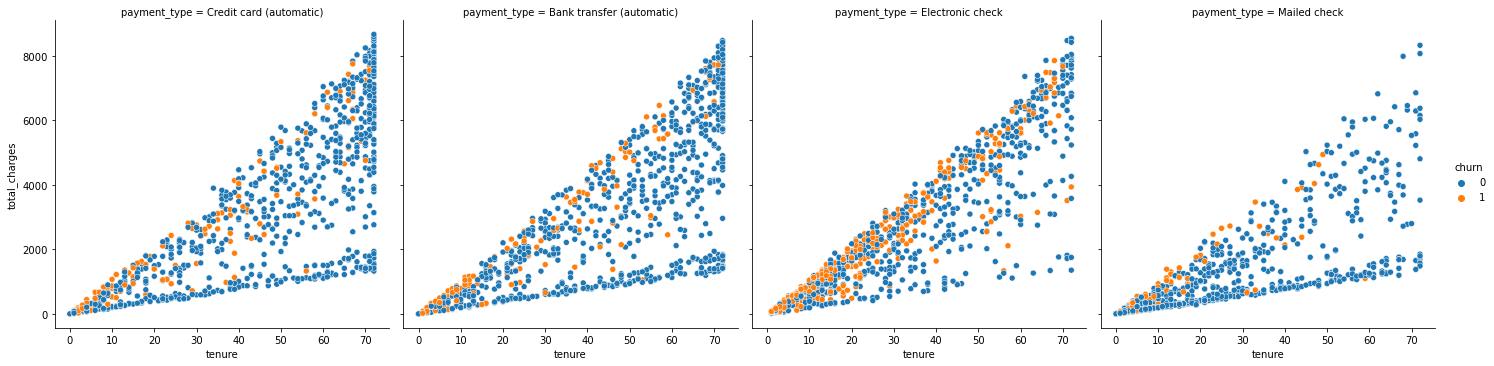

In [9]:
sns.relplot(x="tenure", y="total_charges", data=train, hue='churn', col='payment_type') # 

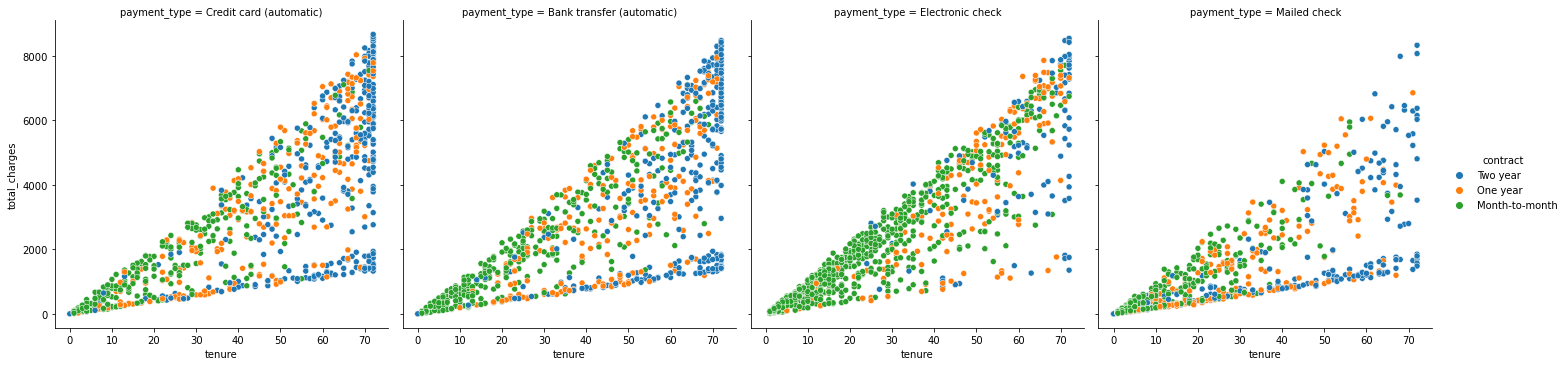

In [10]:
sns.relplot(x="tenure", y="total_charges", data=train, hue='contract', col='payment_type') # 

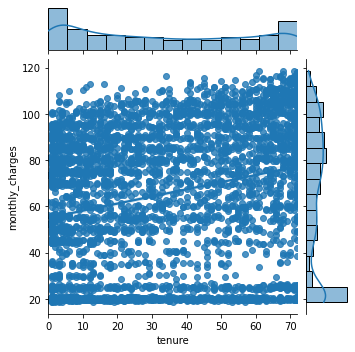

In [11]:
sns.jointplot(x="tenure", y="monthly_charges", data=train, kind='reg', height=5)
plt.show()

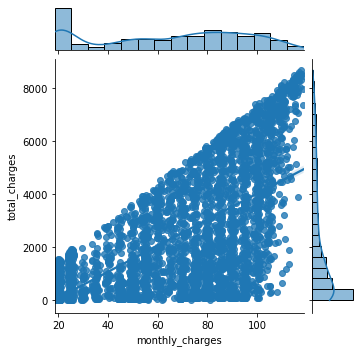

In [12]:
sns.jointplot(x="monthly_charges", y="total_charges", data=train, kind='reg', height=5)
plt.show()

In [13]:
train['months_to_years'] = train.tenure / 12

In [14]:
zillow_df = wr.acquire_zillow()

In [15]:
zillow_df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


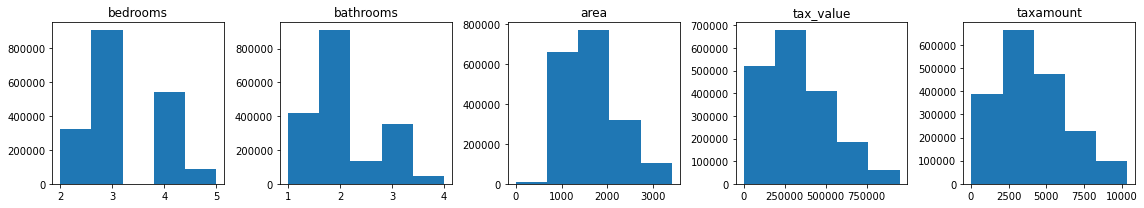

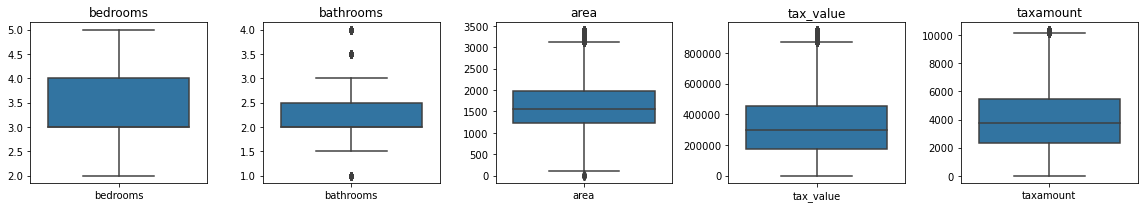

In [16]:
data = wr.prepare_zillow(zillow_df)

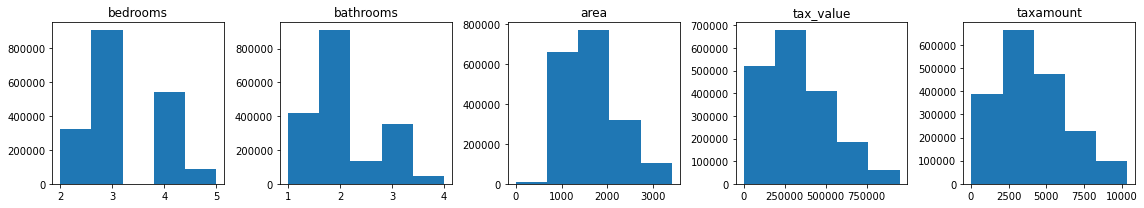

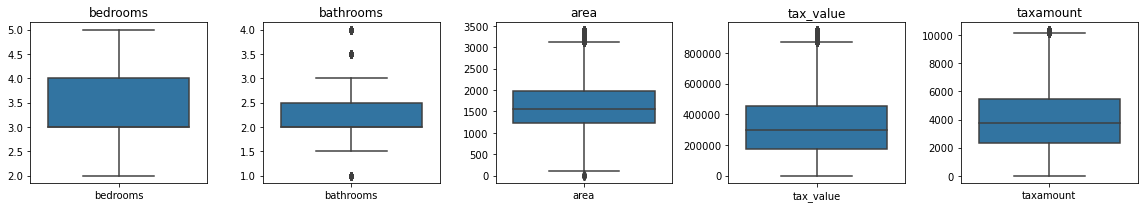

In [17]:
train, validate, test = wr.wrangle_zillow()

In [18]:
#sns.pairplot(train[['bedrooms','bathrooms','area','tax_value','taxamount']], kind='kde')
#plt.show()


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  float64
 5   taxamount   1038959 non-null  float64
 6   fips        1038959 non-null  object 
dtypes: float64(6), object(1)
memory usage: 63.4+ MB


In [20]:
train.shape

(1038959, 7)

In [21]:
train.bedrooms.value_counts()

3.0    507250
4.0    302187
2.0    179630
5.0     49892
Name: bedrooms, dtype: int64

In [22]:
train.bathrooms.value_counts()

2.00    509197
1.00    216159
3.00    197005
2.50     74419
4.00     17958
1.50     17273
3.50      6946
1.75         2
Name: bathrooms, dtype: int64

In [23]:
train.fips.value_counts()

6037.0    695131
6059.0    262366
6111.0     81462
Name: fips, dtype: int64

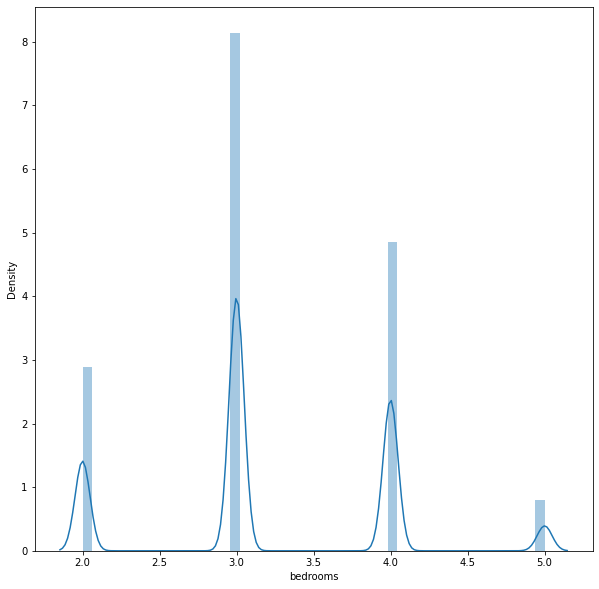

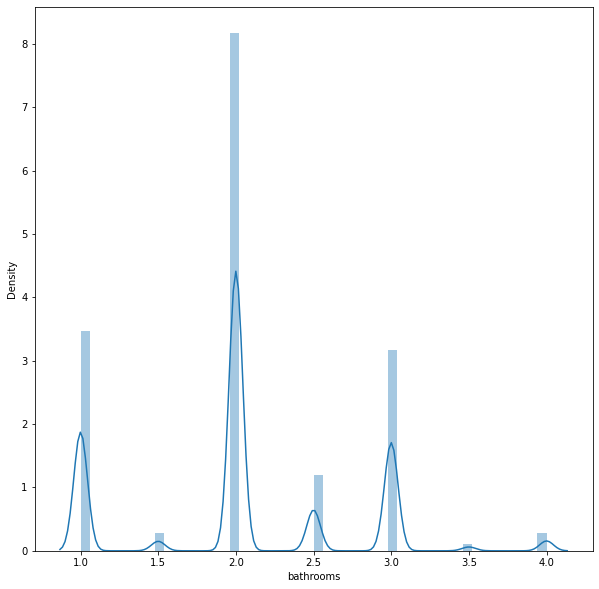

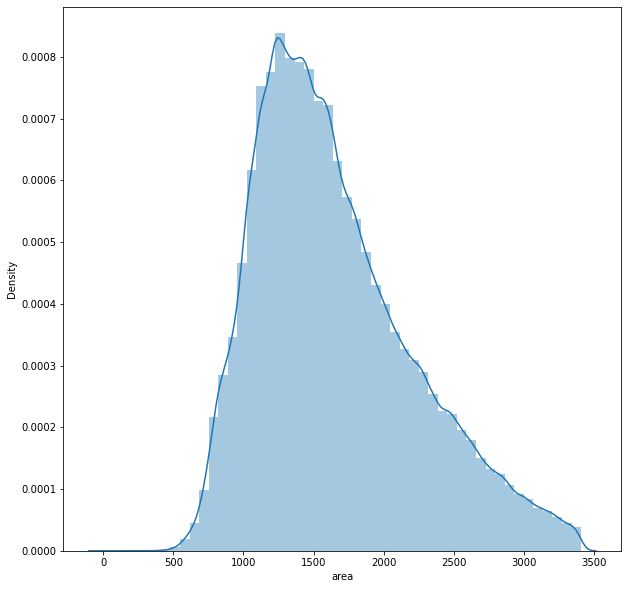

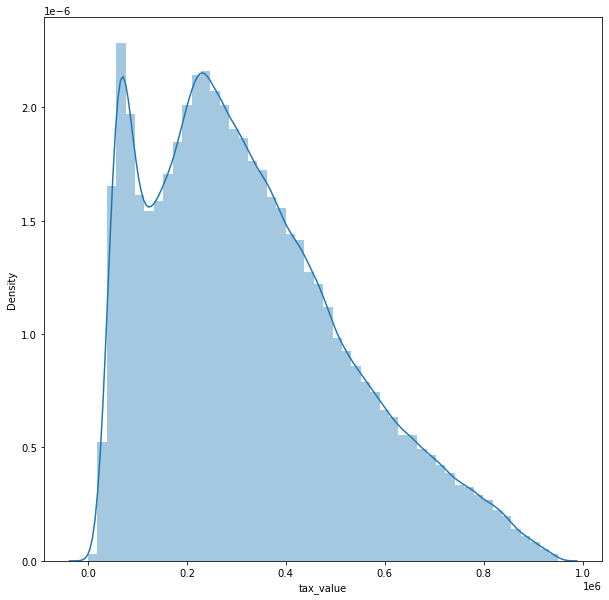

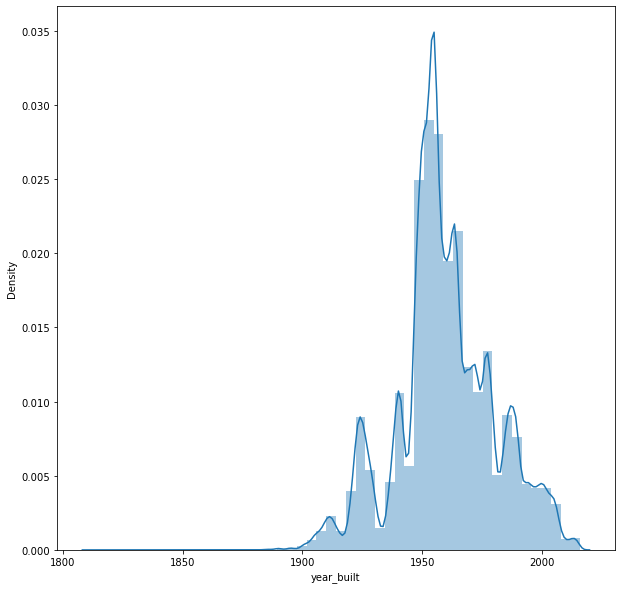

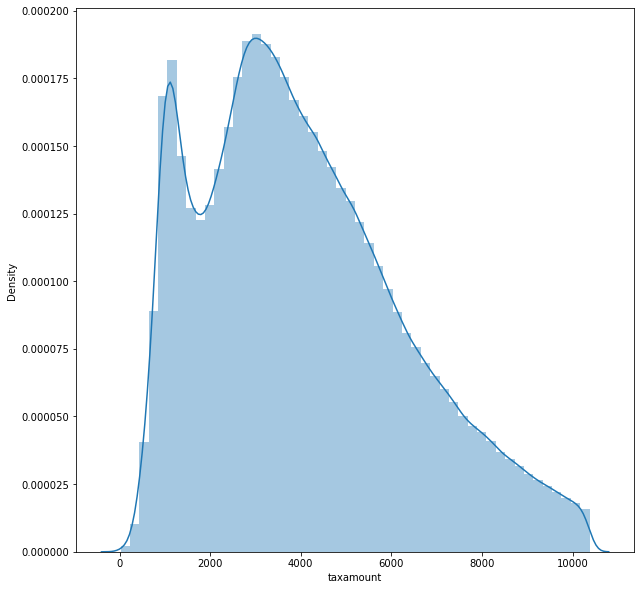

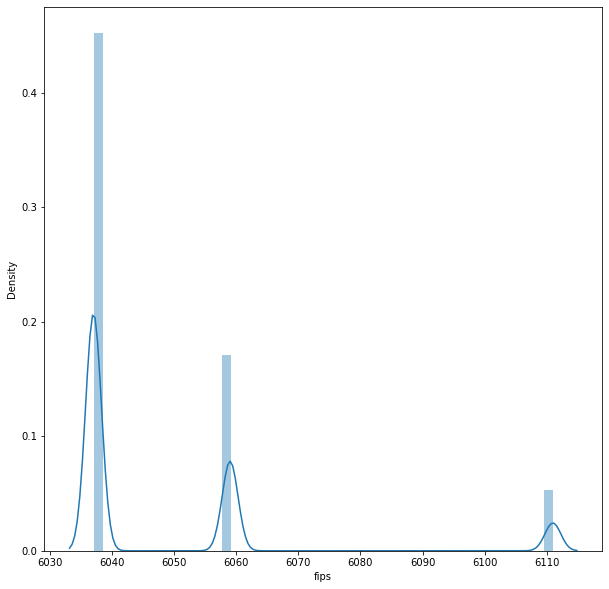

In [24]:
# let us plot all the columns to look at their distributions
for i in train.columns:
    plt.figure(figsize = (10,10))
    sns.distplot(train[i])
    plt.show()

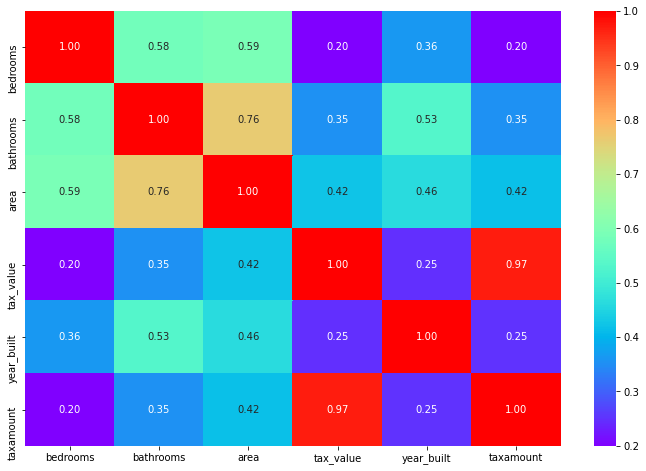

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

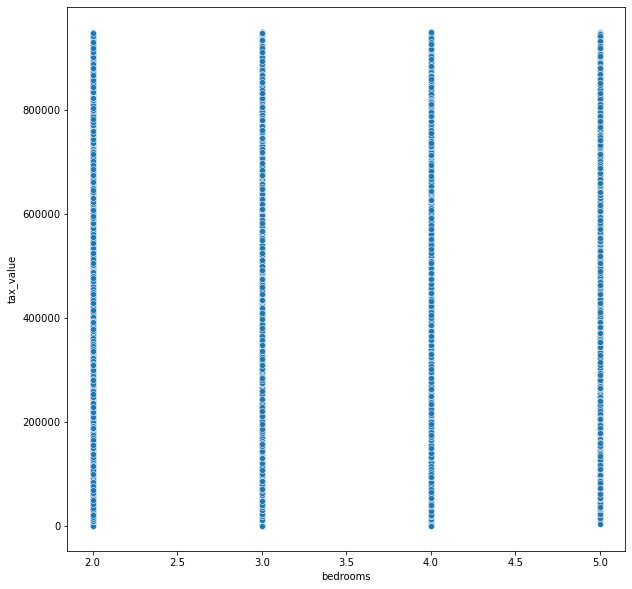

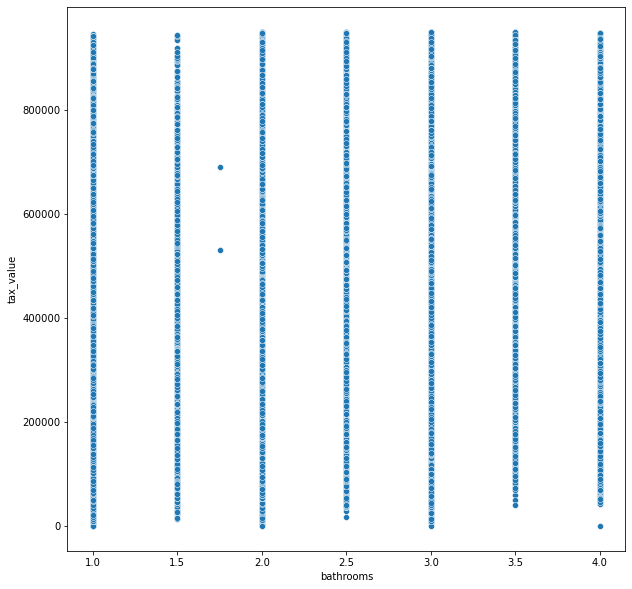

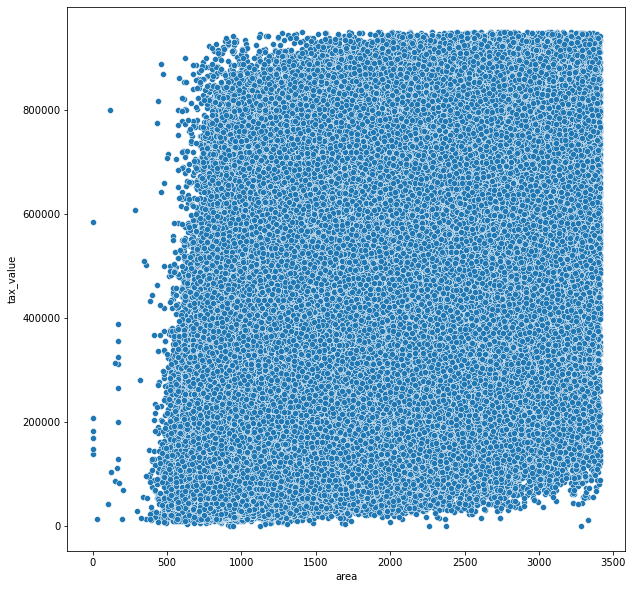

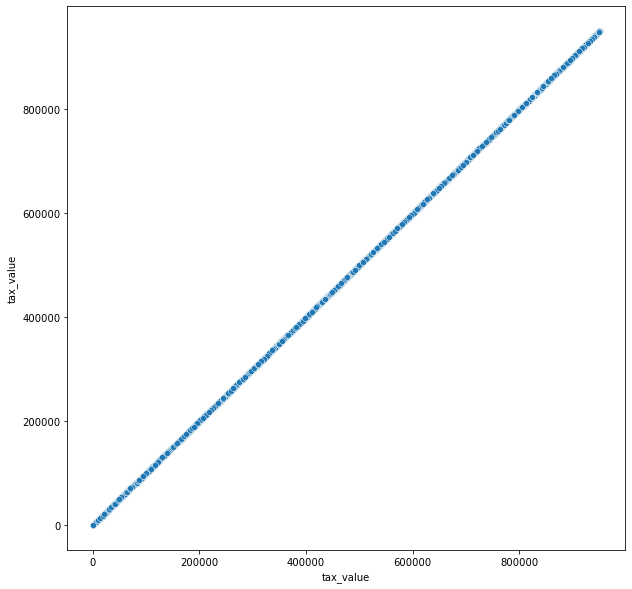

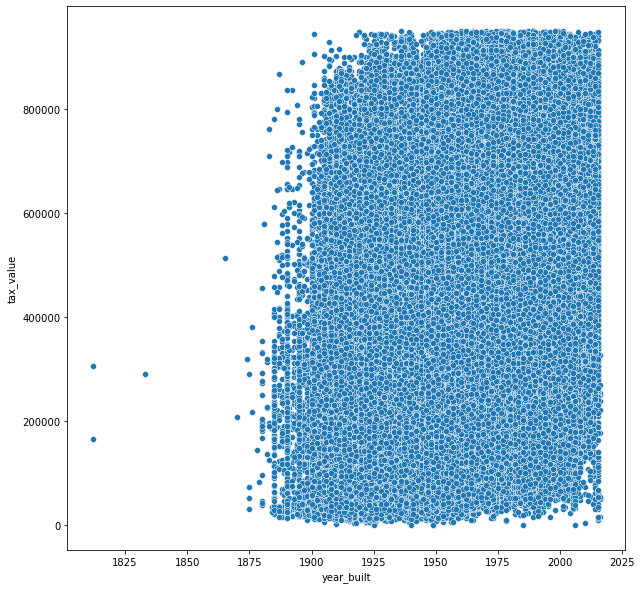

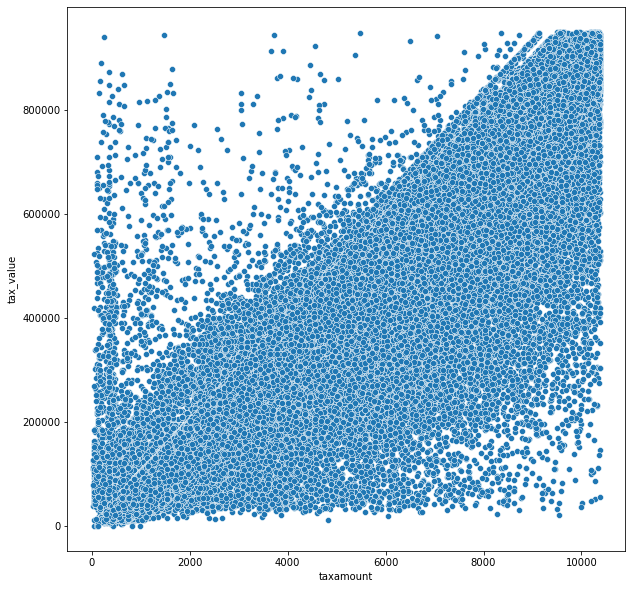

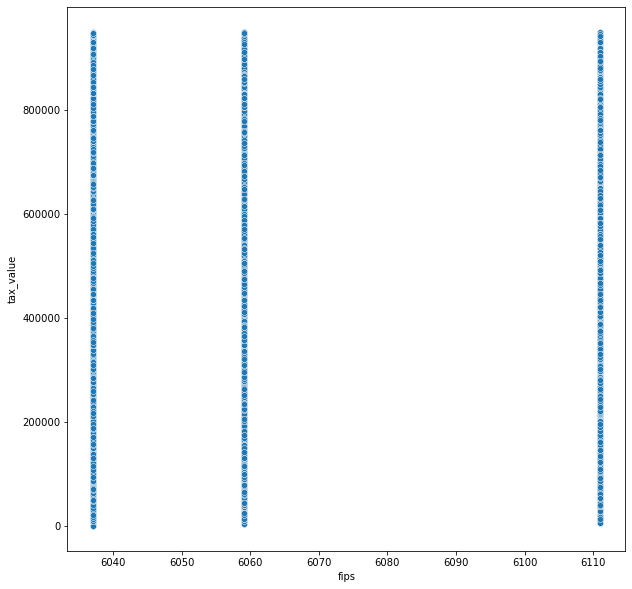

In [26]:
 #Bivariate Scatterplot of tax_value with all the features
for i in train.columns:
    plt.figure(figsize = (10,10))
    sns.scatterplot(x = train[i], y = train['tax_value'])
    plt.show()     

In [ ]:
sns.regplot(x='tax_value', y='taxamount', data=train, ci=None)
 

In [ ]:
sns.violinplot(x='tax_value', y='taxamount', data=train)
 

In [ ]:
sns.barplot(x='tax_value', y='taxamount', data=train)

In [ ]:
a = sns.PairGrid(df, y_vars = ['bathrooms'], x_vars = ['tax_value','taxamount'], height=4.5, hue='fips')
ax = a.map(plt.scatter)